<a href="https://colab.research.google.com/github/ccbeltran/Talento_Tech/blob/main/%C3%81rea_bajo_la_curva_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# __CURSO DE PROGRAMACIÓN PARA ANALÍTICA DE DATOS__

> ## __Estimar el área bajo la curva__
>
> ## Docente: Jorge Victorino [jvictorinog@ucentral.edu.co](jvictorinog@ucentral.edu.co)<br>
> ### Facultad de Ingeniería y Ciencias Básicas <br>
> ### Universidad Central <br>
> <br>
>
> ## __Integrantes__

> ##   Cristian Camilo Beltran Montaña
[cbeltranm1@ucentral.edu.co]
> ##   Miguel Angel Jimenez Bonilla
[mjimenezb4@ucentral.edu.co]


>**Problema:**

>> Trabajo1, Estimar el área bajo la curva
>>
>---



# __Problema__

Se requiere calcular el valor aproximado del área bajo la curva en el intervalo [a, b] de una
función matemática f(x). El método a utilizar que aproxima el resultado consiste dividir el
intervalo bajo la curva en rectángulos o trapecios del mismo ancho. La altura de los
rectángulos o trapecios estaría dada por la función. Las áreas de cada elemento son
simples de calcular y entonces se suman para obtener una estimación de la integral. Entre
más rectángulos mejor es la aproximación. Para resolver el problema el trabajo tiene las
siguientes partes:

>> __Parte I. Algoritmos para calcular el área.__

Se debe implementar dos métodos para calcular la integral, el primer método con
rectángulos y el segundo con trapecios.

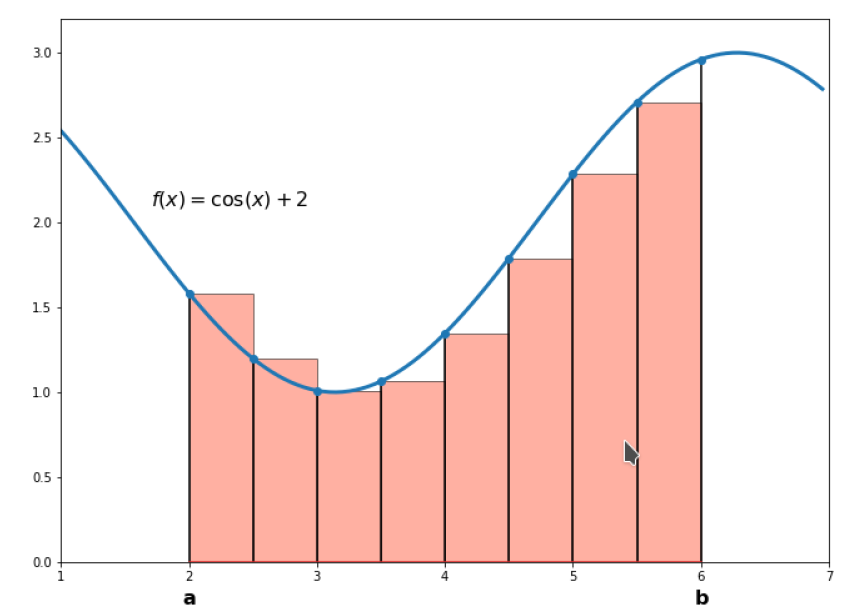

>> __Figura 1.__

Ejemplo de aproximación del área bajo la función f(x) en el intervalo [a,b] dada por
la suma del área de los rectángulos. En este ejemplo el intervalo [a=2, b=6] se divide en 8
rectángulos de un ancho fijo igual a 0.5. Observe que la altura de cada rectángulo es el valor de la función en el vértice superior izquierdo.

---



## __1. Con base en rectángulos:__

El intervalo se divide en n rectángulos del mismo ancho,
y donde la altura está dada por el valor de la función f(x) en el inicio o lado izquierdo
de cada rectángulo, tal se muestra en la figura 1. Posteriormente, se calcula la
integral como el área total que resulta de la suma del área de todos los rectángulos
que conforman el intervalo.


## __2. Cálculo de la integral definida a partir de trapecios:__

Al igual que la técnica
anterior el intervalo se divide en n trapecios del mismo ancho. Las alturas de cada
trapecio al lado izquierdo y derecho está dada por la función f(x). Posteriormente, la
integral o el área bajo la curva se aproxima como el área total que resulta de la suma
de todos los trapecios que conforman el intervalo, tal como se ve en la figura
siguiente:

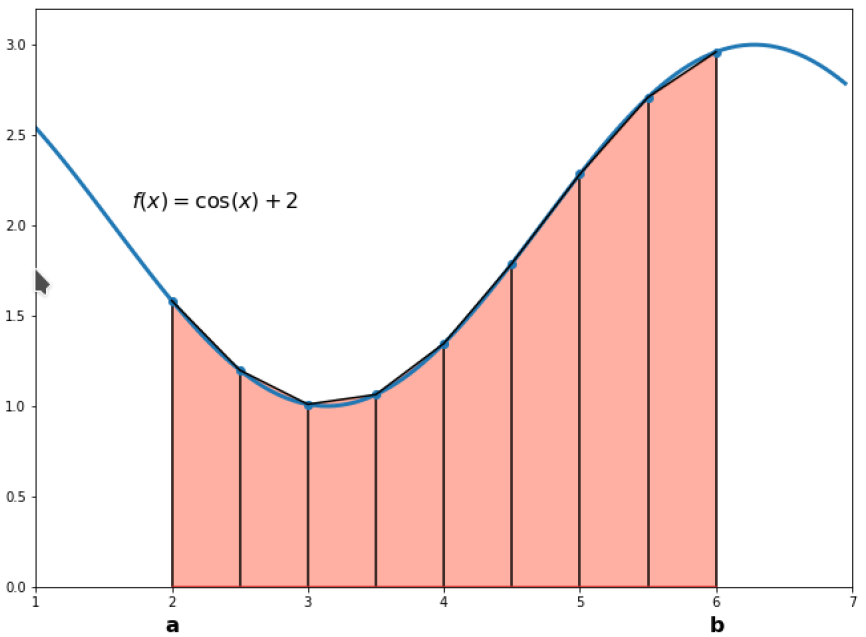

>> __Figura 2.__

Ejemplo de aproximación del área bajo la curva de la función f(x) en el intervalo
[a,b] dada por la suma del área de ocho trapecios. Observe que la altura de cada trapecio
es el valor de la función en los vértices superior izquierdo y superior derecho.







In [6]:
#Parte I. Algoritmos para calcular el área.
##   f->La función a integrar.
##   a->Límite inferior del intervalo.
##   b->Límite superior del intervalo.
##   n->Número de rectángulos o trapecios.
##   metodo->Método de integración.

### Colocamos una condición para llamar a la función creada dependiendo si es un rectangulo o un trapecio, sino generamos un error de Método invalido
def calcular_area(f, a, b, metodo, n):
    if metodo == 'rect':
        return rectangulos(f, a, b, n)
    elif metodo == 'trap':
        return trapecio(f, a, b, n)
    else:
        print("Error: Método no válido")
    return None

### definimos la función del rectanculo o trapecio segun corresponda y se procede a calcular el área
def rectangulos(f, a, b, n):
    ancho = (b - a) / n
    area = 0
    x = a

    for i in range(n):
        altura = eval(f)(x)
        area += ancho * altura
        x += ancho
    return area

def trapecio(f, a, b, n):
    ancho = (b - a) / n
    area = 0
    x = a

    for i in range(n):
        altura_izquierda = eval(f)(x)
        x += ancho
        altura_derecha = eval(f)(x)
        area += (ancho / 2) * (altura_izquierda + altura_derecha)
    return area



>> __Parte II. Cálculo de funciones matemáticas.__

En esta parte se definen las funciones matemáticas a las cuales se les va a calcular la
integral, y los límites en donde se define cada función. Todas las funciones están por
encima de cero y por tanto se considera que el área de todos los elementos es mayor que
cero (positiva):

    Función base               Expresión               Intervalo
    1. seno (sen)              F(x) = sen(x) + 1       min = 0, max = 2*pi
    2. coseno (cos)            F(x) = cos(x) + 2       min = 0, max = 2*pi
    3. exponencial (exp)       F(x) = exp(x) - 1       min = 0, max = 8
    4. logaritmo natural (ln)  F(x) = ln(x)            min = 1, max = 20

 La columna intervalo define los límites en los cuales se calcula la función, es decir que los
valores de a y b deben estar dentro del intervalo.

>> __Parte II.A Aproximar funciones con series de Taylor.__

Para hallar un valor de la función en el punto x, no es necesario usar librerías de python.
Dado un valor de x se debe aplicar el método basado en “Serie de Taylor” para hallar F(x)
como se muestra en la siguiente tabla:

${Función seno} \\
sen x = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} \quad \text{para toda } x$


${Función coseno} \\
\cos x = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!} x^{2n} \quad \text{para toda } x$


${Función exponencial} \\
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!}$


${Función logaritmo natural} \\
\ln(x) = 2 \sum_{n=0}^{\infty} \frac{1}{2n+1} \left( \frac{x-1}{x+1} \right)^{2n+1}$

En donde el símbolo de admiración ! significa el valor factorial.

In [3]:
#Parte II. Cálculo de funciones matemáticas.
## Calculamos el factorial de un número n
def factorial(n):
  if n == 0:
    return 1
  elif n ==1:
    return 1
  elif n > 1:
    return n*factorial(n-1)


## Calcular seno de x usando la serie de Taylor
def sen(x, terms=120):
    result = 0
    for n in range(terms):
        result += (((-1)**n /factorial(2*n+1)) * x**(2*n+1))
    return result
## Calcula el coseno de x usando la serie de Taylor.
def cos(x, terms=80):
    result = 0
    for n in range(terms):
        result += ((-1)**n *x**(2*n)) / factorial(2*n)
    return result
## Calcular la exponencial de x (e^x) usando la serie de Taylor.
def exp(x, terms=170):
    result = 0
    for n in range(terms):
        result += x**n / factorial(n)
    return result

## Calcular el logaritmo natural de x usando la serie de Taylor.
def ln(x, terms=150):
    result = 0
    for n in range(terms):
        result += (2*((1 / (2*n+1)) * ((x-1) / (x+1))**(2*n+1)))
    return result

>> __Parte III.Pruebas de los programas.__

Una parte importante en la implementación de los algoritmos son las pruebas. El trabajo
debe implementar una función que permite ejecutar varias pruebas. La función recibe el
nombre de un archivo de texto como parámetro y devuelve los valores de cada prueba. El
formato del archivo es el siguiente:

● línea 1: valor entero que indica cuántas pruebas hay en el archivo

● línea 2 a línea n+1: n-líneas cada una con cinco valores separados por coma y sin
espacios, los cuales corresponden a una prueba. Los cinco valores son:

a. nombre de la función. Es uno de estos: {sen, cos, exp, ln}

b. valor real que indica el inicio del intervalo [a]

c. valor real que indica el final del intervalo [b]

d. nombre del método para calcular el área. Es uno de estos: {rect, trap}

e. valor entero positivo que indica la cantidad de elementos (rectángulos o
trapecios) en que se divide el intervalo para el cálculo. El valor mínimo es 3 y
el máximo es 2000.


Por ejemplo, el siguiente archivo contiene a la función de integral 8 veces con diferentes
parámetros que son: función, intervalo, método de integración y cantidad de elementos.

    Ejemplo de contenido de un archivo de entrada:
    8
    sen,0.1,1.1,rect,10
    exp,1,3,trap,3
    exp,1,3,trap,2000
    exp,1,8,trap,1000
    ln,1.2,1.5,rect,500
    ln,1.2,1.5,trap,500
    cos,0.1,1.1,rect,10
    cos,0.1,1.1,trap,10

In [5]:
#Parte III.Pruebas de los programas
## Con la función ejecutar pruebas se carga un archivo txt que es el que contiene los datos de prueba con las funciones y métodos, asi como los limites
def ejecutar_pruebas(nombre_archivo):

##Se guardan los resultados en una lista vacia que posteriormente arroja el resultado de los datos cargados en el archivo txt
  resultados = []
  with open(nombre_archivo, 'r') as archivo:
## Lee una línea del archivo y elimina los espacios en blanco, se Divide la línea en partes usando la coma como separador. Esto devuelve una lista con los valores.
      num_pruebas = int(archivo.readline().strip())
      for _ in range(num_pruebas):
          linea = archivo.readline().strip()
          funcion, a, b, metodo, n = linea.split(',')
          a = float(a)
          b = float(b)
          n = int(n)


          print(f"Calcular el área para la función: {funcion}, intervalo: [{a}, {b}], metodo: {metodo}, n: {n}")

          resultado = calcular_area(funcion, a, b, metodo, n)
          #resultados.append(resultado)
          resultados.append((funcion, a, b, metodo, n, resultado))



  return resultados
## se imprime cada resultado
resultados = ejecutar_pruebas('archivo.txt')
for resultado in resultados:
    print(resultado)

Calcular el área para la función: sen, intervalo: [0.1, 1.1], metodo: rect, n: 10
Calcular el área para la función: exp, intervalo: [1.0, 3.0], metodo: trap, n: 3
Calcular el área para la función: exp, intervalo: [1.0, 3.0], metodo: trap, n: 20
Calcular el área para la función: exp, intervalo: [1.0, 8.0], metodo: trap, n: 10
Calcular el área para la función: ln, intervalo: [1.2, 1.5], metodo: rect, n: 50
Calcular el área para la función: ln, intervalo: [1.2, 1.5], metodo: trap, n: 25
Calcular el área para la función: cos, intervalo: [0.1, 1.1], metodo: rect, n: 10
Calcular el área para la función: cos, intervalo: [0.1, 1.1], metodo: trap, n: 10
Calcular el área para la función: cos, intervalo: [0.1, 1.1], metodo: tra, n: 10
Error: Método no válido
Calcular el área para la función: sen, intervalo: [0.1, 1.1], metodo: rect, n: 10
Calcular el área para la función: exp, intervalo: [1.0, 3.0], metodo: trap, n: 3
Calcular el área para la función: exp, intervalo: [1.0, 3.0], metodo: trap, n: 

>> __Parte IV.Gráfica de ejemplo.__

Se debe construir una función que dibuje la gráfica de la función F(x) con los rectángulos o
trapecios de la prueba que se realiza. La gráfica se debe ver similar a como se muestran la
figura 1 y la figura 2 de la parte I. La función de graficar recibe los mismos 5 parámetros de
la función que calcula el área bajo la curva de la función.
En resumen el trabajo debe tener al menos estas funciones:
1. calcular_area (funcion, a, b, metodo, num_elementos)
2. aplicar_pruebas (archivo)
3. generar_grafica (funcion, a, b, metodo, num_elementos)
4. Adicionalmente todas las otras funciones que necesite como son: funciones de
series de taylor para seno, coseno, exponencial y logaritmo, factorial, etc

('sen', 0.1, 1.1, 'rect', 10, 0.5013880980983713)


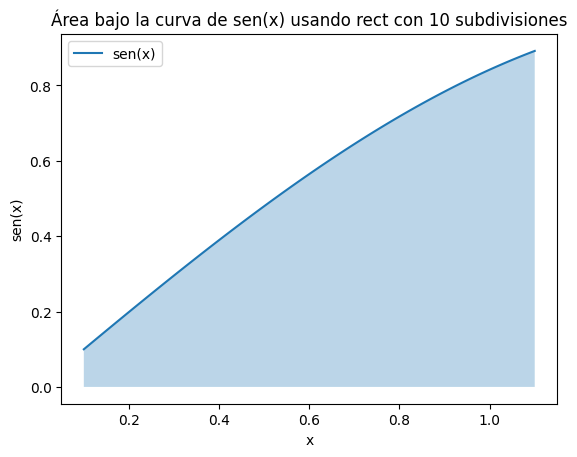

('exp', 1.0, 3.0, 'trap', 3, 18.005771951746087)


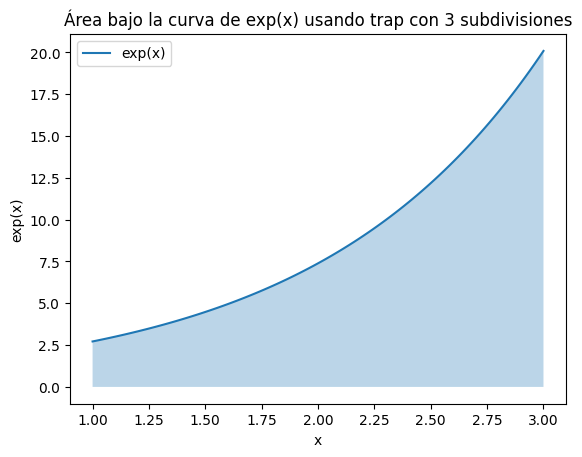

('exp', 1.0, 3.0, 'trap', 2000, 17.367256541997328)


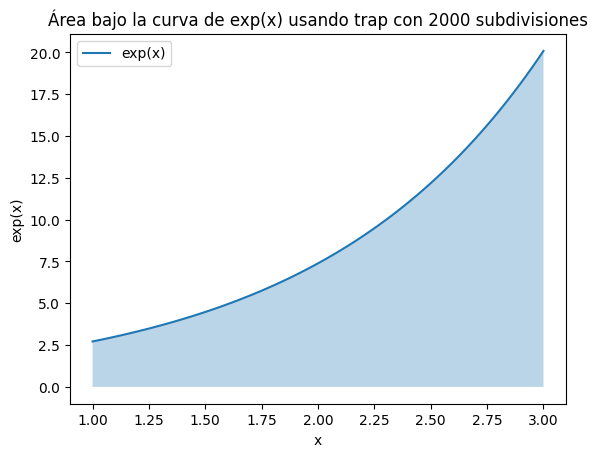

('exp', 1.0, 8.0, 'trap', 1000, 2978.251866348435)


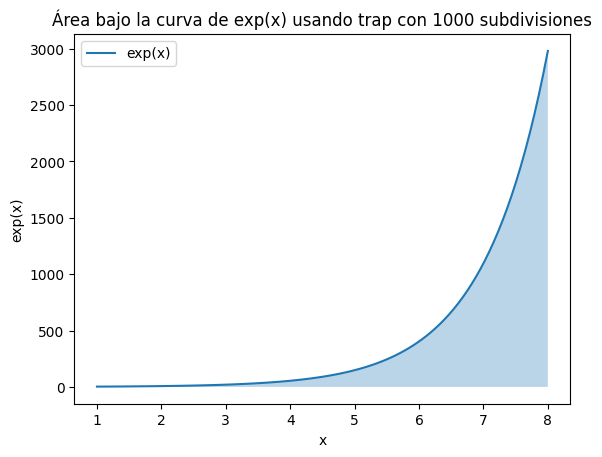

('ln', 1.2, 1.5, 'rect', 500, 0.08934484594410334)


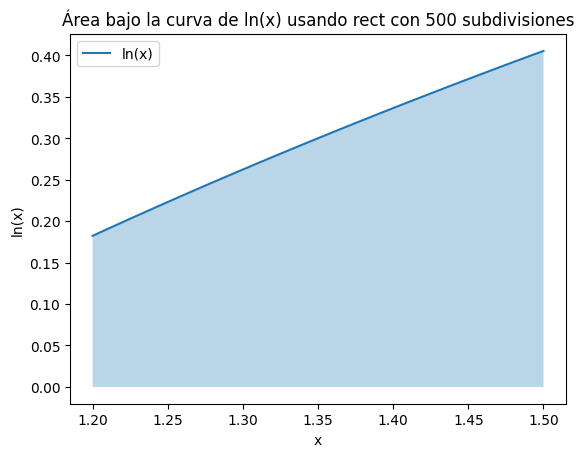

('ln', 1.2, 1.5, 'trap', 500, 0.08941178900949755)


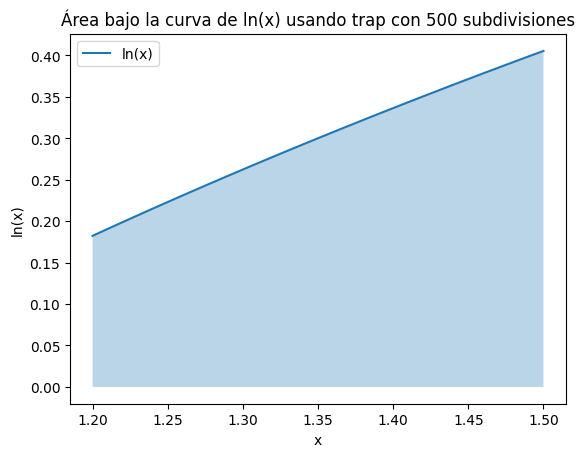

('cos', 0.1, 1.1, 'rect', 10, 0.8177847573818268)


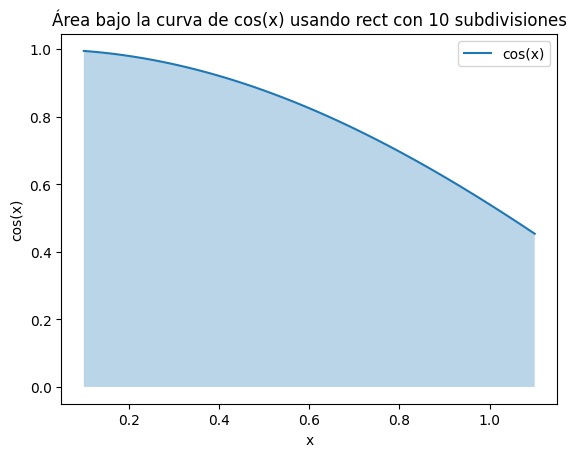

('cos', 0.1, 1.1, 'trap', 10, 0.7907143551892045)


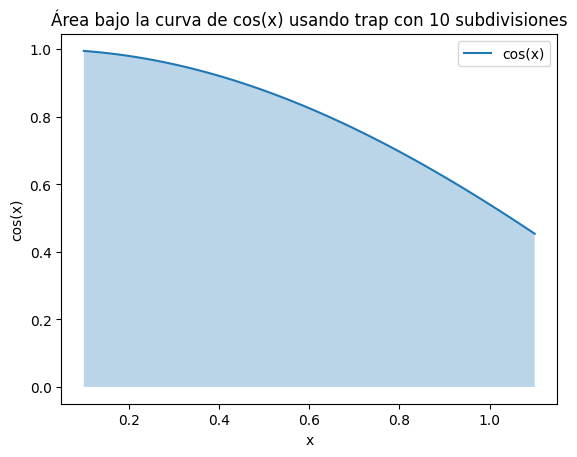

('cos', 0.1, 1.1, 'tra', 10, None)
Error: Método no válido


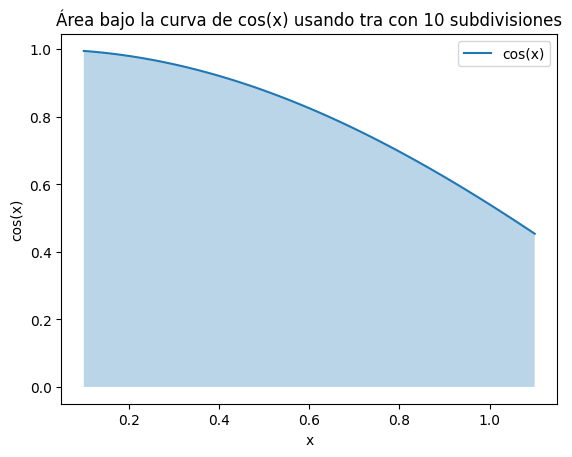

('sen', 0.1, 1.1, 'rect', 10, 0.5013880980983713)


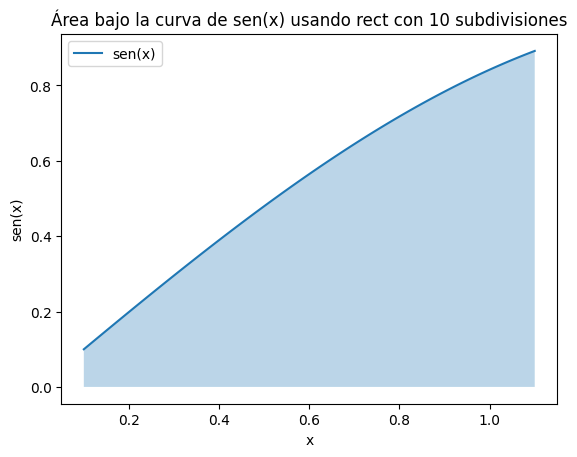

('exp', 1.0, 3.0, 'trap', 3, 18.005771951746087)


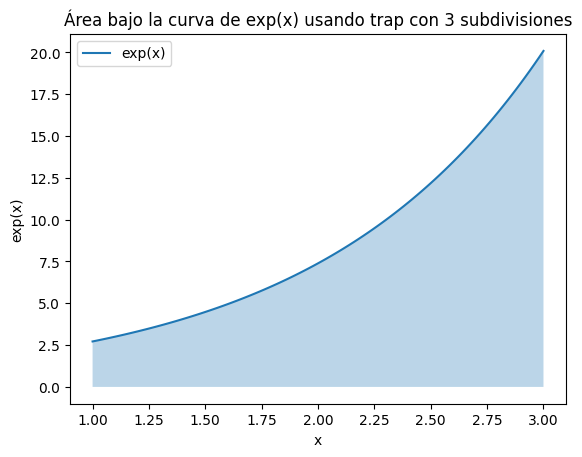

('exp', 1.0, 3.0, 'trap', 2000, 17.367256541997328)


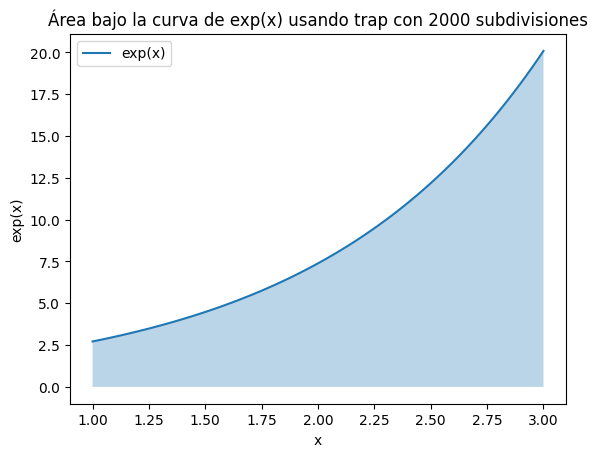

('exp', 1.0, 8.0, 'trap', 1000, 2978.251866348435)


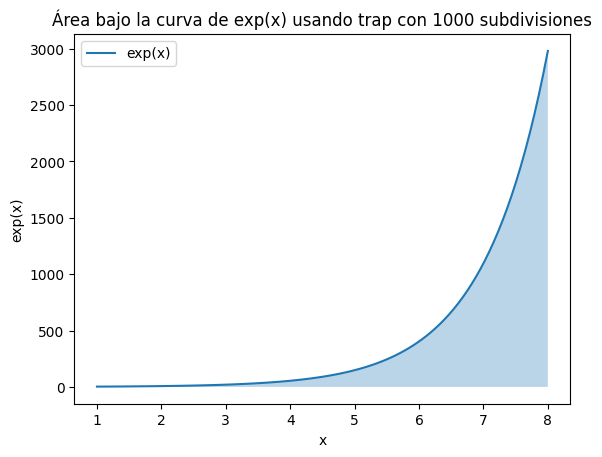

('ln', 1.2, 1.5, 'rect', 500, 0.08934484594410334)


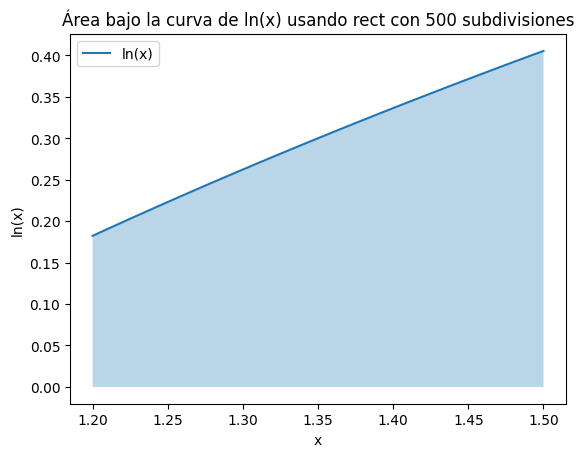

('ln', 1.2, 1.5, 'trap', 500, 0.08941178900949755)


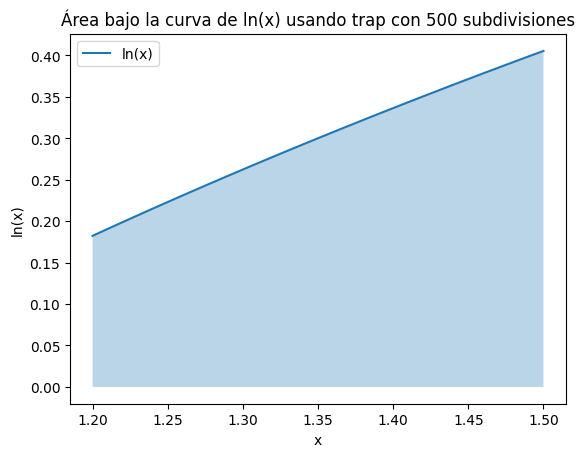

('cos', 0.1, 1.1, 'rect', 10, 0.8177847573818268)


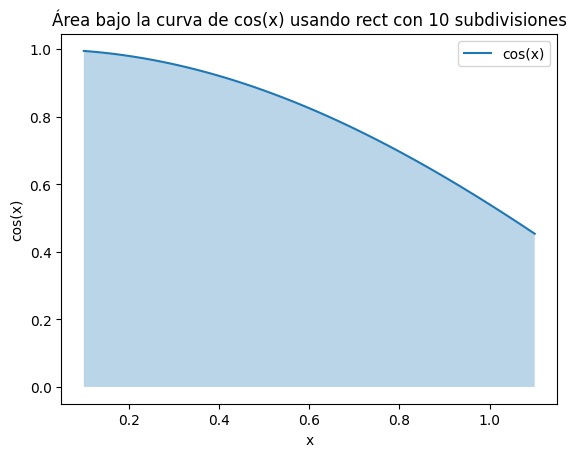

('cos', 0.1, 1.1, 'trap', 10, 0.7907143551892045)


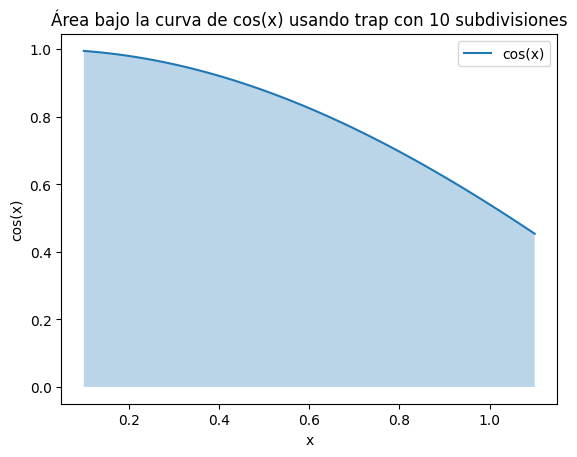

In [ ]:
#Parte IV.Gráfica
import matplotlib.pyplot as plt

def generar_grafica(funcion, a, b, metodo, num_elementos):

    area = calcular_area(funcion, a, b, metodo, num_elementos)

    # Generar valores de x - y para la gráfica
    x_values = [a + i * (b - a) / 100 for i in range(101)]
    y_values = [eval(funcion)(x) for x in x_values]

    # Graficar la función y el área bajo la curva
    plt.plot(x_values, y_values, label=f'{funcion}(x)')
    plt.fill_between(x_values, y_values, where=[a <= x <= b for x in x_values], alpha=0.3)
    plt.title(f'Área bajo la curva de {funcion}(x) usando {metodo} con {num_elementos} subdivisiones')
    plt.xlabel('x')
    plt.ylabel(f'{funcion}(x)')
    plt.legend()
    plt.show()


for resultado in resultados:
    print(resultado)
    funcion, a, b, metodo, n, _ = resultado
    generar_grafica(funcion, a, b, metodo, n)

## __Pautas del trabajo:__

● Implementar todas las partes del trabajo.

● Se debe crear una función principal que se encarga de calcular el valor del área
llamada "calcular_area", la cual recibe como parámetros: (nombre de la función, a, b,
método, n). En donde la función es alguna de las cuatro, definidas en la Parte II:
{'sen', 'cos', 'exp', 'ln'}, a es un valor real que indica el inicio del intervalo, b es un
valor real que indica el final del intervalo a integrar, método indica la figura a usar
para aproximar la integral {'rect', 'trap'}. Y n es el número de elementos (cantidad de
rectángulos o trapecios) en que se divide el intervalo [a, b]. La función debe retornar
el valor aproximado del área.

● Para obtener el valor de cada función matemática se debe crear una función en
python que recibe el valor de x y retorna el valor de f(x) utilizando el método basado
en la serie de Taylor. El método hace un ciclo para cada término de la serie para
aproximar el valor de la función. Se debe garantizar la precisión en el cálculo de la
función hasta 15 cifras significativas en los intervalos definidos en la parte 2, como
ejemplo el resultado debe ser:

    ○ seno(5.9) = -0.37387666483023
    ○ coseno(5.9) = 0.927478430744035
    ○ exponencial(8.0) = 2980.957987041728
    ○ log_natural(10.0) = 2.30258509299404

● Adicionalmente, se debe hacer una función aparte para el cálculo del factorial.

● La forma de probar el programa es con un archivo de entrada como se especifica en
la parte III. Para esto se proponen los siguientes pasos:
○ Hacer una función para leer cualquier archivo de texto que cumpla el formato
de entrada especificado en la parte III. Utilizando el contenido del archivo se
obtienen N veces los parámetros de entrada y se debe llamar a la función
principal para cada juego de parámetros.
○ Hacer un archivo de entrada de prueba con al menos 10 ejemplos. En donde
se prueban todas las funciones, aplicando configuraciones diferentes en cada
caso: intervalo diferente, método distinto y cantidad de elementos diferente.
○ Hacer una tabla con los parámetros de entrada y los resultados obtenidos y
agregarla al reporte.

● No se pueden usar funciones de otras librerías, todo debe ser construido por
ustedes excepto las funciones de la librería para construir gráficas de matplotlib.
Por ejemplo, no se puede usar numpy, sklearn, math, etc.

● Todas las funciones deben estar documentadas, y la documentación debe salir en la
ayuda de python. es decir, deben tener la descripción de:

    ○ la función,
    ○ los parámetros de entrada,
    ○ los valores de retorno

● Se deben escribir antes de cada función el análisis del problema en lenguaje natural.
El análisis consiste en una serie de pasos sencillos a seguir para obtener la solución.

● La entrega del trabajo consiste en un archivo tipo notebook de python (extensión
*ipynb) el cual se debe descargar y subir a la plataforma. Adicionalmente, un archivo
de pruebas en formato texto llamado pruebas.txt. Adjuntar los dos archivos sin
comprimir. En caso de requerirse, el trabajo es susceptible de sustentación por
cualquiera de los integrantes del grupo.

● El notebook debe llevar un encabezado o portada con los integrantes, el curso, el
grupo, profesor, logo de la central, descripción del trabajo, cómo se calcula cada
función con la serie de Taylor y cómo se calcula la integral con los dos métodos
(rectángulos y trapecios).

## __Rúbrica de evaluación:__

El trabajo se divide en las siguientes partes que se califican sobre 5 y se promedian:

● Parte 1. Funciones para el cálculo de la integral por los métodos de rectángulos
(rect) y trapecios (trap).

    ○ Si el programa no funciona y produce errores la calificación es menor a 2.0

    ○ Si el programa funciona incorrectamente, o el método es incorrecto la
    calificación es menor a 3.

    ○ Si el programa tiene errores de precisión la calificación es menor a 4.

    ○ Si la función no tiene los parámetros pedidos, y no tiene la documentación se
    puede bajar hasta 5 décimas

    ○ Para obtener 5 el programa debe calcular con exactitud todas las pruebas de
    un archivo de prueba externo (archivo del profesor) y cumplir con todos los
    requisitos.

● Parte 2. Funciones para el cálculo de las funciones matemáticas (seno, coseno,
exponencial y logaritmo natural).

    ○ Si las funciones no operan y produce errores la calificación es menor a 2.0

    ○ Si el método está incorrecto la calificación es menor a 3.

    ○ Si la función tiene errores de precisión la calificación es menor a 4.

    ○ Si las funciones no tiene los parámetros pedidos, y no tiene la
    documentación se puede bajar hasta 5 décimas

    ○ Para obtener 5, todas las funciones del profesor con éxito y cumplir con todos
    los requisitos.

● Parte 3. Función para probar

    ○ Si la función de prueba falla o muestra errores la calificación es menor a 2.

    ○ Si el archivo de prueba no cumple con las especificaciones la calificación es
    menor a 3

    ○ Para obtener 5 la función debe poder recibir cualquier archivo con el formato
    especificado, producir una tabla con los resultados. El archivo de ejemplo
    tiene más de 20 pruebas, y los resultados del archivo de prueba están en el
    reporte como una tabla.

● Parte 4. Función que produce la gráfica y presentación del notebook.

    ○ Para obtener 5, se requiere una portada completa más la descripción del
    trabajo, organización del documento en secciones por cada parte y
    subsecciones para cada punto, correcto nombre del asunto del correo y los
    archivos, correcta ortografía y redacción, gráfica correcta. Por cada uno de
    estos puntos que haga falta se reduce en 5 décimas la nota.

## __El trabajo se entrega en grupo (máximo de 3 personas). El contenido de todo el trabajo presentado debe ser de elaboración propia. Cualquier copia de parte de código o texto anula el trabajo.__